In [ ]:
Ziele:
- es geht um schöne visualisierungen
- es geht um mögliche szenarien wie die energieversorgung aussehen kann in 10-20 jahren 
- wichtigsten Parameter mit einbringen: lithium preis, preis produktion, zubau china
- interaktive Karten zu verbrennung, Kohle, solar, wind, gas, wasser, atom?
- aufzeigen, welche länder am meisten profitieren, welche länder die stärksten abhängigkeiten haben?





In [ ]:
- einfach anfangen, welche länder produzieren wie viel von was, früher bis heute 

In [30]:
# Imports 

import pandas as pd
import matplotlib.pyplot as plt

In [14]:
# https://ourworldindata.org/energy-production-consumption

df_gl_energy = pd.read_csv("global-energy-substitution/global-energy-substitution.csv")
df_gl_energy.head()

,Entity,Code,Year,Other renewables,Modern biofuels,Solar,Wind,Hydropower,Nuclear,Natural gas,Oil,Coal,Traditional biomass
0,World,OWID_WRL,1800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,97.0,5556
1,World,OWID_WRL,1810,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,128.0,5833
2,World,OWID_WRL,1820,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,153.0,6111
3,World,OWID_WRL,1830,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,264.0,6389
4,World,OWID_WRL,1840,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,356.0,6944


In [18]:
df_gl_energy.tail()

,Entity,Code,Year,Other renewables,Modern biofuels,Solar,Wind,Hydropower,Nuclear,Natural gas,Oil,Coal,Traditional biomass
72,World,OWID_WRL,2020,2152.2898,1068.2296,2116.7441,3940.1646,10763.280,6639.5180,38704.047,49101.246,42316.324,11111
73,World,OWID_WRL,2021,2317.5542,1128.1194,2593.0813,4582.7812,10575.532,6903.3267,40225.734,51846.820,44642.164,11111
74,World,OWID_WRL,2022,2379.4795,1193.1312,3249.7456,5184.6016,10650.595,6583.3306,40059.652,53562.110,44926.926,11111
75,World,OWID_WRL,2023,2411.3584,1319.2163,4026.5818,5665.2080,10392.080,6677.1300,40151.220,54838.684,45319.086,11111
76,World,OWID_WRL,2024,2476.3567,1366.8783,5150.5693,6124.4653,10860.753,6871.8350,41278.270,55292.082,45850.543,11111


In [24]:
df_gl_energy.shape

(77, 13)

In [26]:
df_gl_energy.describe()

,Year,Other renewables,Modern biofuels,Solar,Wind,Hydropower,Nuclear,Natural gas,Oil,Coal,Traditional biomass
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,1969.220779,570.016403,256.737076,317.701247,646.854888,5281.304086,3685.607914,17603.726730,31582.953260,24013.608039,10014.896104
std,55.305759,707.535928,389.783936,922.492526,1418.429399,3486.968655,3087.531356,12857.540872,18289.342888,13902.787381,1955.315882
min,1800.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,97.000000,5556.000000
25%,1967.000000,62.458030,9.383716,0.000000,0.000000,2793.728800,113.905594,7374.058000,20778.916000,16333.144000,9274.000000
50%,1986.000000,267.010560,84.202995,0.029453,0.385643,5572.425000,4429.821300,16421.107000,36641.938000,24263.818000,10653.000000
75%,2005.000000,798.361270,234.475200,11.242224,281.256070,7825.955000,6677.130000,27439.225000,46633.970000,36200.953000,11441.000000
max,2024.000000,2476.356700,1366.878300,5150.569300,6124.465300,10860.753000,7494.947800,41278.270000,55292.082000,45850.543000,12500.000000


In [28]:
df_gl_energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Entity               77 non-null     object 
 1   Code                 77 non-null     object 
 2   Year                 77 non-null     int64  
 3   Other renewables     77 non-null     float64
 4   Modern biofuels      77 non-null     float64
 5   Solar                77 non-null     float64
 6   Wind                 77 non-null     float64
 7   Hydropower           77 non-null     float64
 8   Nuclear              77 non-null     float64
 9   Natural gas          77 non-null     float64
 10  Oil                  77 non-null     float64
 11  Coal                 77 non-null     float64
 12  Traditional biomass  77 non-null     int64  
dtypes: float64(9), int64(2), object(2)
memory usage: 7.9+ KB


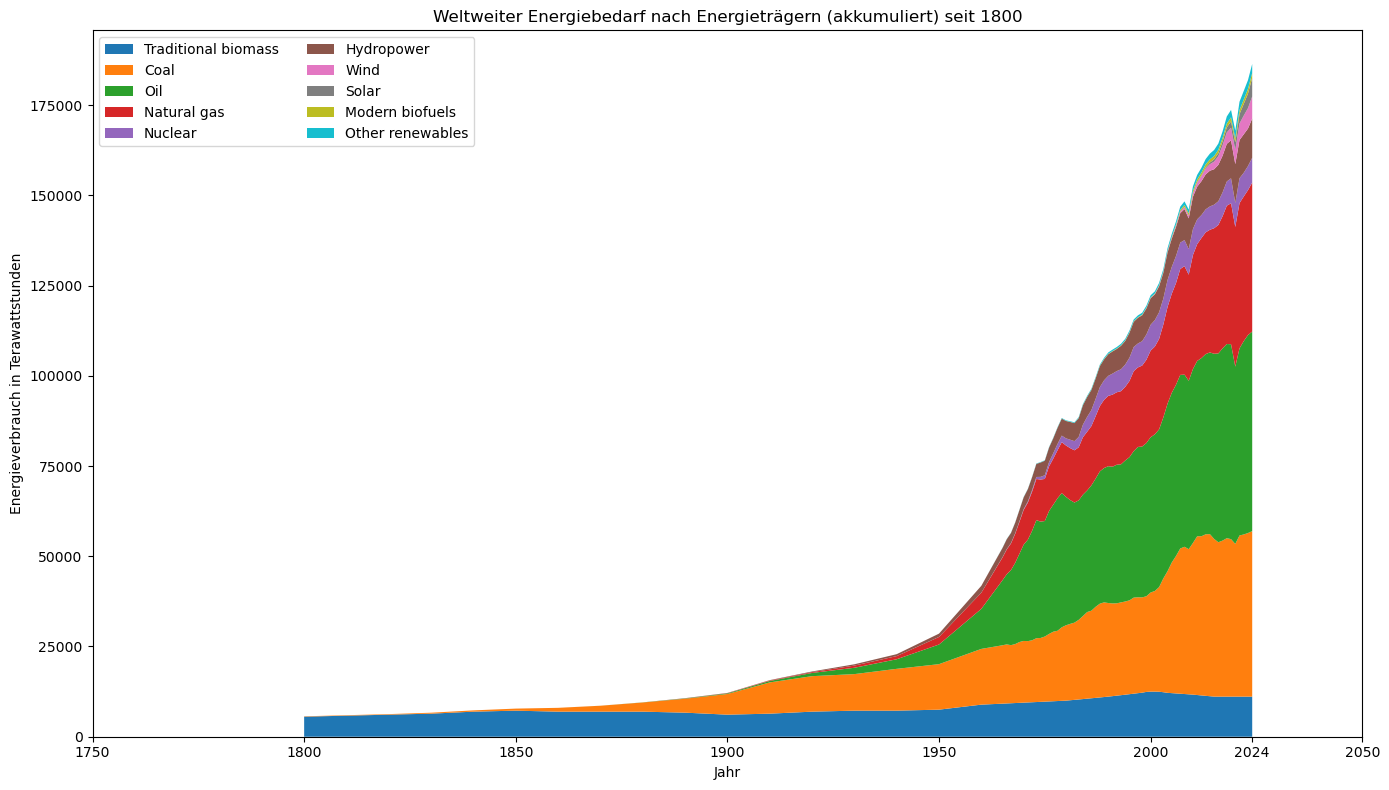

In [42]:
# grafik, 
# X-Achse
years = df_gl_energy["Year"]

# Y-Achse
energy_cols = [
    "Traditional biomass",
    "Coal",
    "Oil",
    "Natural gas",
    "Nuclear",
    "Hydropower",
    "Wind",
    "Solar",
    "Modern biofuels",
    "Other renewables"
]

plt.figure(figsize=(14, 8))

plt.stackplot(
    years,
    [df_gl_energy[col] for col in energy_cols],
    labels=energy_cols
)

plt.title("Weltweiter Energiebedarf nach Energieträgern (akkumuliert) seit 1800")
plt.xlabel("Jahr")
plt.ylabel("Energieverbrauch in Terawattstunden")

# letzte Jahreszahl garantieren
plt.xticks(list(plt.xticks()[0]) + [years.iloc[-1]])

plt.legend(loc="upper left", ncol=2)
plt.tight_layout()

plt.show()

In [ ]:
# andere grafik, welche die prozentualen Änderungen 

# Global Electricity Production (https://ourworldindata.org/grapher/electricity-prod-source-stacked)

In [47]:
df_glob_elec = pd.read_csv("electricity-prod-source-stacked/electricity-prod-source-stacked.csv")

In [49]:
df_glob_elec.head()

,Entity,Code,Year,Other renewables,Bioenergy,Solar,Wind,Hydropower,Nuclear,Oil,Gas,Coal
0,ASEAN (Ember),NaN,2000,16.93,5.87,0.0,0.0,50.45,0.0,65.07,164.26,76.03
1,ASEAN (Ember),NaN,2001,16.40,6.46,0.0,0.0,54.33,0.0,50.99,190.41,86.26
2,ASEAN (Ember),NaN,2002,16.61,6.62,0.0,0.0,53.29,0.0,54.32,208.92,93.43
3,ASEAN (Ember),NaN,2003,15.74,7.45,0.0,0.0,53.21,0.0,53.38,226.51,102.01
4,ASEAN (Ember),NaN,2004,16.57,8.40,0.0,0.0,52.99,0.0,59.50,244.16,115.01


In [52]:
df_glob_elec.tail()

,Entity,Code,Year,Other renewables,Bioenergy,Solar,Wind,Hydropower,Nuclear,Oil,Gas,Coal
6709,Zimbabwe,ZWE,2019,0.0,0.19,0.02,0.0,4.17,0.0,0.05,0.0,4.05
6710,Zimbabwe,ZWE,2020,0.0,0.10,0.02,0.0,3.81,0.0,0.04,0.0,2.74
6711,Zimbabwe,ZWE,2021,0.0,0.11,0.02,0.0,5.93,0.0,0.00,0.0,2.51
6712,Zimbabwe,ZWE,2022,0.0,0.11,0.03,0.0,5.88,0.0,0.00,0.0,2.92
6713,Zimbabwe,ZWE,2023,0.0,0.12,0.03,0.0,5.46,0.0,0.00,0.0,2.70


- vorliegende Daten sind nach Region und Ländern geordnet
- Unterscheidung einfacher, wenn Regionen betrachtet werden, also Summe über spezifizierte Werte
- 

In [66]:
print(min(df_glob_elec["Year"]))

1985


In [60]:
# unique 
print(sorted(df_glob_elec["Entity"].unique()))

['ASEAN (Ember)', 'Afghanistan', 'Africa', 'Africa (EI)', 'Africa (Ember)', 'Albania', 'Algeria', 'American Samoa', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia', 'Asia (Ember)', 'Asia Pacific (EI)', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'CIS (EI)', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'EU (Ember)', 'East Timor', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Europe', 'Europe (EI

Was ist Ember? 

# Worldwide

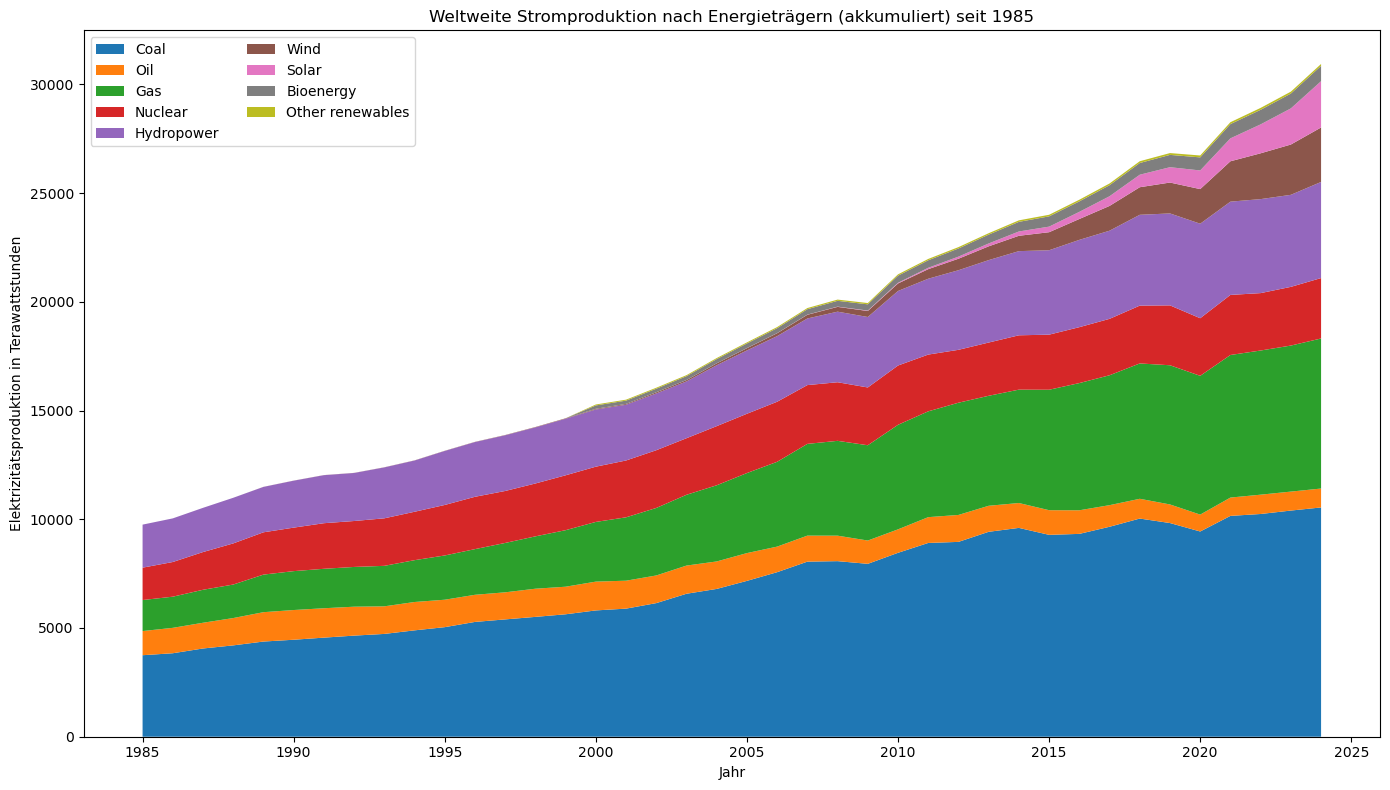

In [68]:
electricity_cols = [
    "Coal",
    "Oil",
    "Gas",
    "Nuclear",
    "Hydropower",
    "Wind",
    "Solar",
    "Bioenergy",
    "Other renewables"
]

df_world = df_glob_elec[df_glob_elec["Entity"] == "World"]

plt.figure(figsize=(14, 8))

plt.stackplot(
    df_world["Year"],
    [df_world[col] for col in electricity_cols],
    labels=electricity_cols
)

plt.title("Weltweite Stromproduktion nach Energieträgern (akkumuliert) seit 1985")
plt.xlabel("Jahr")
plt.ylabel("Elektrizitätsproduktion in Terawattstunden")

plt.legend(loc="upper left", ncol=2)
plt.tight_layout()
plt.show()


## Deutschland 

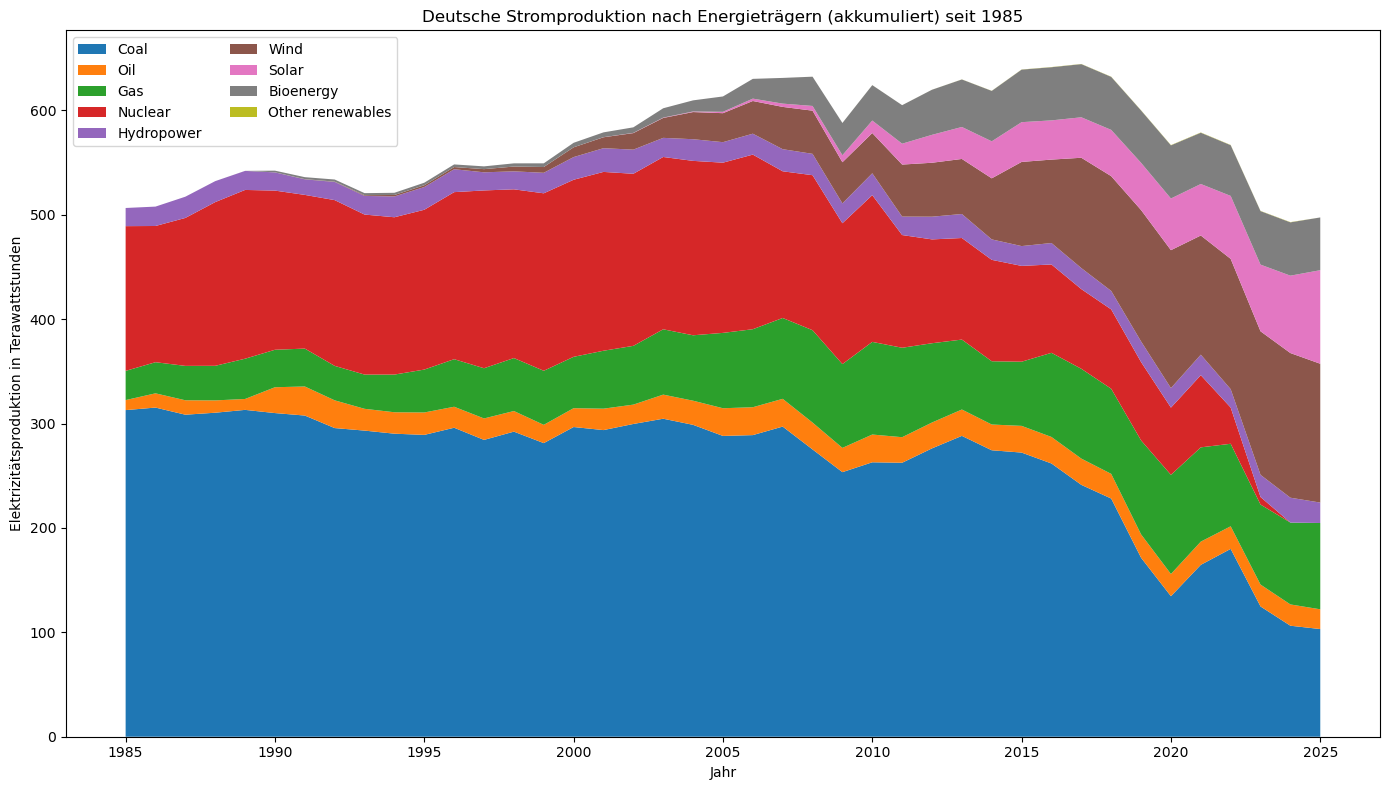

In [80]:
electricity_cols = [
    "Coal",
    "Oil",
    "Gas",
    "Nuclear",
    "Hydropower",
    "Wind",
    "Solar",
    "Bioenergy",
    "Other renewables"
]

df_germany = df_glob_elec[df_glob_elec["Entity"] == "Germany"]

plt.figure(figsize=(14, 8))

plt.stackplot(
    df_germany["Year"],
    [df_germany[col] for col in electricity_cols],
    labels=electricity_cols
)

plt.title("Deutsche Stromproduktion nach Energieträgern (akkumuliert) seit 1985")
plt.xlabel("Jahr")
plt.ylabel("Elektrizitätsproduktion in Terawattstunden")

plt.legend(loc="upper left", ncol=2)
plt.tight_layout()
plt.show()

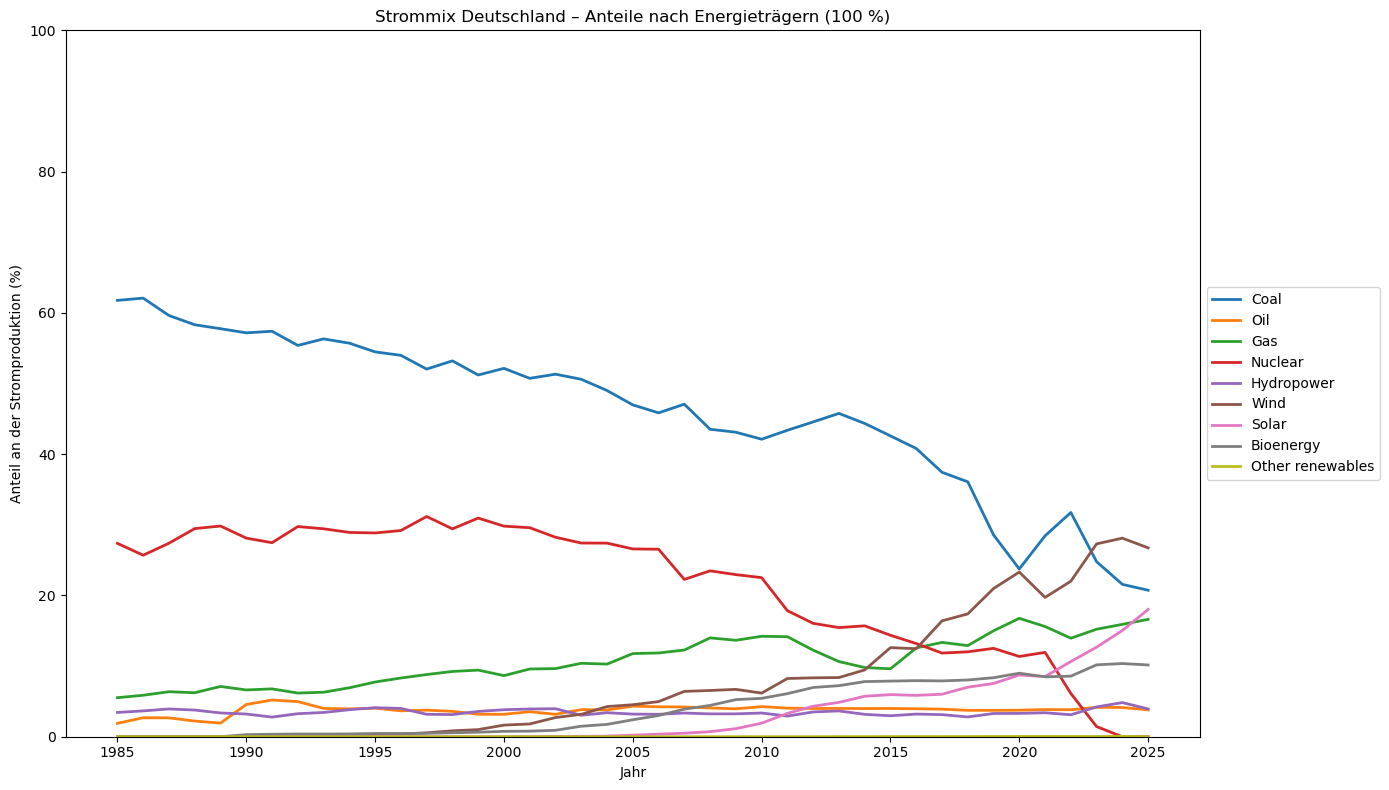

In [78]:
# Lineplot für Deutschland gerechnet auf 100%

df_germany = df_glob_elec[df_glob_elec["Entity"] == "Germany"].copy()

# Gesamtstrom pro Jahr
df_germany["Total"] = df_germany[electricity_cols].sum(axis=1)

# Prozentanteile
for col in electricity_cols:
    df_germany[col + "_share"] = df_germany[col] / df_germany["Total"] * 100

plt.figure(figsize=(14, 8))

for col in electricity_cols:
    plt.plot(
        df_germany["Year"],
        df_germany[col + "_share"],
        linewidth=2,
        label=col
    )

plt.title("Strommix Deutschland – Anteile nach Energieträgern (100 %)")
plt.xlabel("Jahr")
plt.ylabel("Anteil an der Stromproduktion (%)")

plt.ylim(0, 100)
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()


In [20]:
Literatur

https://ourworldindata.org/energy-production-consumption

https://ourworldindata.org/grapher/electricity-prod-source-stacked

SyntaxError: invalid syntax (4045704739.py, line 3)